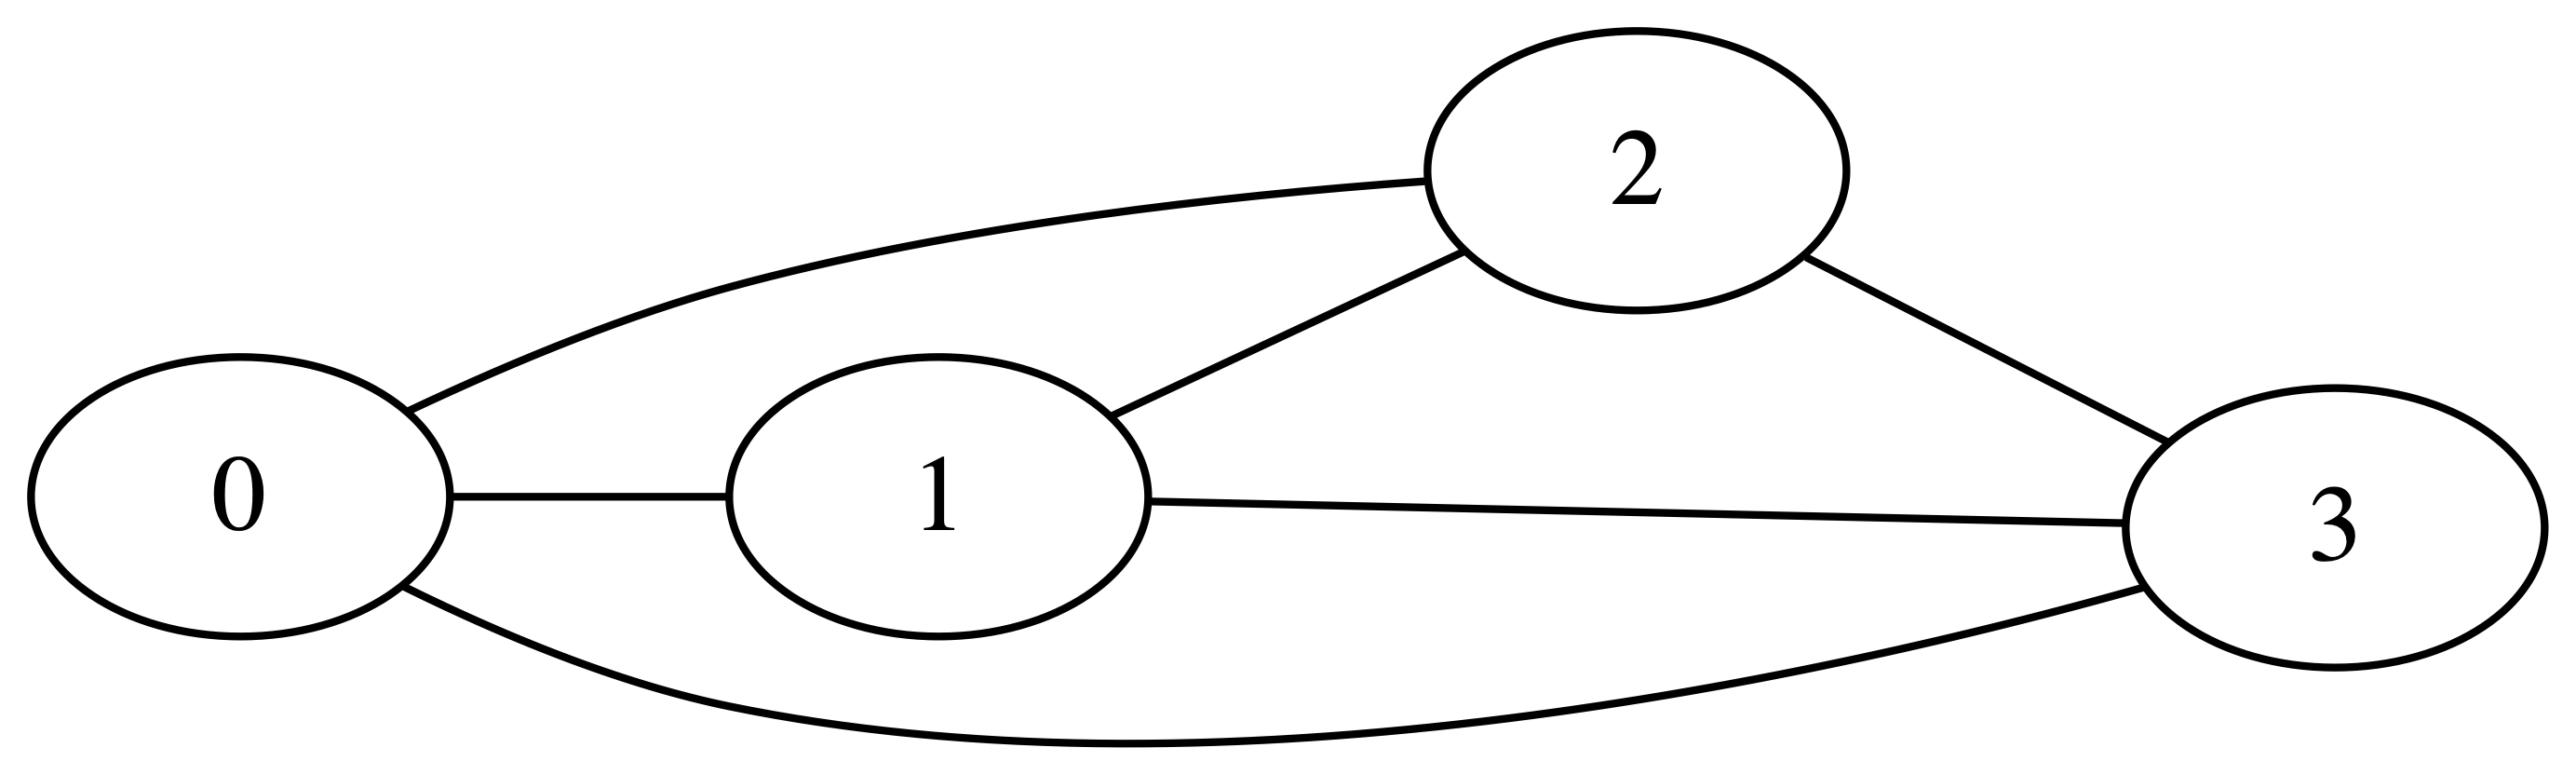

In [8]:
import networkx as nx
from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

g = nx.complete_graph(4)
d = to_pydot(g)
d.set_dpi(600)
d.set_rankdir("LR")
Image(d.create_png(), width=600)

In [4]:
from pgmpy.factors.discrete import TabularCPD
P_A = TabularCPD('A', 3, [[0.1, 0.6, 0.3]])
print(P_A)

╒═════╤═════╕
│ A_0 │ 0.1 │
├─────┼─────┤
│ A_1 │ 0.6 │
├─────┼─────┤
│ A_2 │ 0.3 │
╘═════╧═════╛


In [9]:
P_B_I_A = TabularCPD('B', 3, 
    np.array([[0.6, 0.2, 0.2], [0.3, 0.5, 0.2], [0.1, 0.3, 0.6]]),
    evidence=['A'], evidence_card=[3])
print(P_B_I_A)

╒═════╤═════╤═════╤═════╕
│ A   │ A_0 │ A_1 │ A_2 │
├─────┼─────┼─────┼─────┤
│ B_0 │ 0.6 │ 0.2 │ 0.2 │
├─────┼─────┼─────┼─────┤
│ B_1 │ 0.3 │ 0.5 │ 0.2 │
├─────┼─────┼─────┼─────┤
│ B_2 │ 0.1 │ 0.3 │ 0.6 │
╘═════╧═════╧═════╧═════╛


In [10]:
P_C_I_B = TabularCPD('C', 3, 
    np.array([[0.8, 0.1, 0.1], [0.1, 0.8, 0.1], [0.1, 0.1, 0.8]]),
    evidence=['B'], evidence_card=[3])
print(P_C_I_B)

╒═════╤═════╤═════╤═════╕
│ B   │ B_0 │ B_1 │ B_2 │
├─────┼─────┼─────┼─────┤
│ C_0 │ 0.8 │ 0.1 │ 0.1 │
├─────┼─────┼─────┼─────┤
│ C_1 │ 0.1 │ 0.8 │ 0.1 │
├─────┼─────┼─────┼─────┤
│ C_2 │ 0.1 │ 0.1 │ 0.8 │
╘═════╧═════╧═════╧═════╛


In [11]:
from pgmpy.models import BayesianModel

model = BayesianModel([('A', 'B'), ('B', 'C')])
model.add_cpds(P_A, P_B_I_A, P_C_I_B)
model.check_model()

True

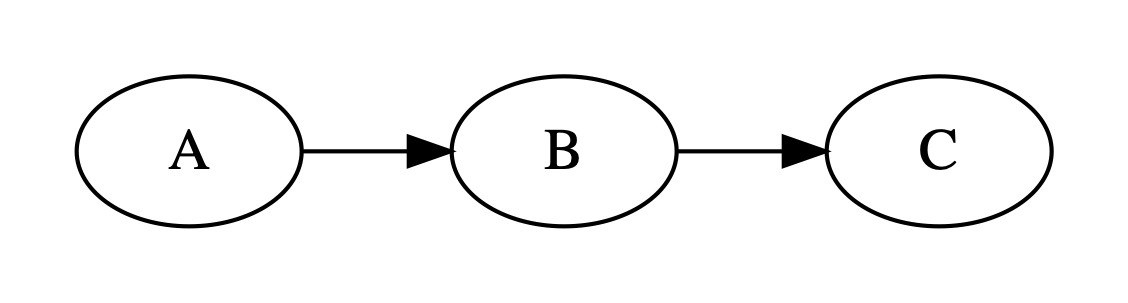

In [12]:
from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

d = to_pydot(model)
d.set_dpi(300)
d.set_margin(0.2)
d.set_rankdir("LR")
Image(d.create_png(), width=600)

In [13]:
from pgmpy.inference import VariableElimination
inference = VariableElimination(model)
result = inference.query(variables=["C"])
print(result["C"])

╒═════╤══════════╕
│ C   │   phi(C) │
╞═════╪══════════╡
│ C_0 │   0.2680 │
├─────┼──────────┤
│ C_1 │   0.3730 │
├─────┼──────────┤
│ C_2 │   0.3590 │
╘═════╧══════════╛


### 몬티 홀 문제

In [18]:
from pgmpy.factors.discrete import TabularCPD

cpd_c = TabularCPD('C', 3, [[0.33, 0.33, 0.33]])
print(cpd_c)

╒═════╤══════╕
│ C_0 │ 0.33 │
├─────┼──────┤
│ C_1 │ 0.33 │
├─────┼──────┤
│ C_2 │ 0.33 │
╘═════╧══════╛


In [19]:
cpd_p = TabularCPD('P', 3, [[0.33, 0.33, 0.33]])
print(cpd_p)

╒═════╤══════╕
│ P_0 │ 0.33 │
├─────┼──────┤
│ P_1 │ 0.33 │
├─────┼──────┤
│ P_2 │ 0.33 │
╘═════╧══════╛


In [20]:
cpd_h = TabularCPD('H', 3, [[0,   0, 0, 0, 0.5, 1, 0, 1, 0.5], 
                            [0.5, 0, 1, 0,   0, 0, 1, 0, 0.5], 
                            [0.5, 1, 0, 1, 0.5, 0, 0, 0, 0  ]],
                   evidence=['C', 'P'], evidence_card=[3, 3])
print(cpd_h)

╒═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╕
│ C   │ C_0 │ C_0 │ C_0 │ C_1 │ C_1 │ C_1 │ C_2 │ C_2 │ C_2 │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ P   │ P_0 │ P_1 │ P_2 │ P_0 │ P_1 │ P_2 │ P_0 │ P_1 │ P_2 │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ H_0 │ 0.0 │ 0.0 │ 0.0 │ 0.0 │ 0.5 │ 1.0 │ 0.0 │ 1.0 │ 0.5 │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ H_1 │ 0.5 │ 0.0 │ 1.0 │ 0.0 │ 0.0 │ 0.0 │ 1.0 │ 0.0 │ 0.5 │
├─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┤
│ H_2 │ 0.5 │ 1.0 │ 0.0 │ 1.0 │ 0.5 │ 0.0 │ 0.0 │ 0.0 │ 0.0 │
╘═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╧═════╛


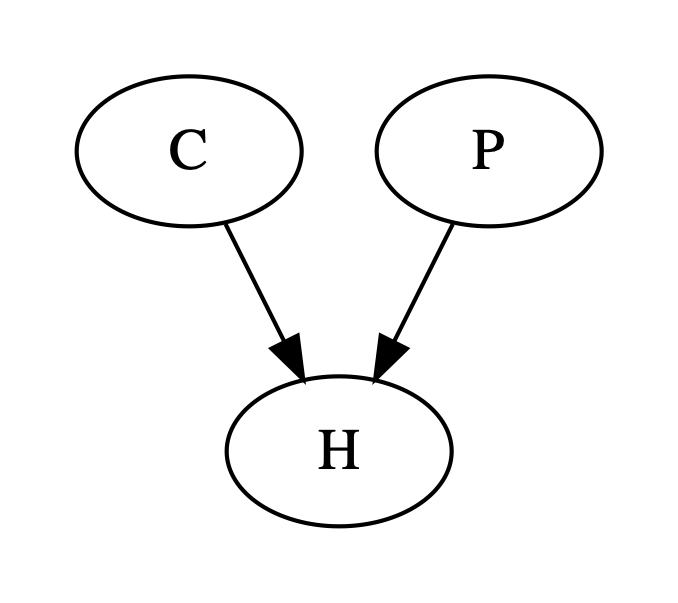

In [21]:
from pgmpy.models import BayesianModel
from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

model_monty = BayesianModel([('C', 'H'), ('P', 'H')])
model_monty.add_cpds(cpd_c, cpd_p, cpd_h)

d = to_pydot(model_monty)
d.set_dpi(300)
d.set_margin(0.2)
Image(d.create_png(), width=400)

In [22]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model_monty)

In [23]:
posterior_c = infer.query(['C'], evidence={'P': 0, 'H': 1})
print(posterior_c['C'])

╒═════╤══════════╕
│ C   │   phi(C) │
╞═════╪══════════╡
│ C_0 │   0.3333 │
├─────┼──────────┤
│ C_1 │   0.0000 │
├─────┼──────────┤
│ C_2 │   0.6667 │
╘═════╧══════════╛


In [28]:
cpd_X1 = TabularCPD('X1', 2, [[0.8, 0.2]])
cpd_X2 = TabularCPD('X2', 2, [[0.9, 0.2],[0.1,0.8]], evidence=['X1'], evidence_card=[2])
cpd_X3 = TabularCPD('X3', 2, [[0.6, 0.4]])
cpd_X4 = TabularCPD('X4', 2, [[0.9, 0.5, 0.3, 0.1], [0.1, 0.5, 0.7, 0.9]], evidence=['X2', 'X3'], evidence_card=[2, 2])

In [34]:
print(cpd_X4)

╒══════╤══════╤══════╤══════╤══════╕
│ X2   │ X2_0 │ X2_0 │ X2_1 │ X2_1 │
├──────┼──────┼──────┼──────┼──────┤
│ X3   │ X3_0 │ X3_1 │ X3_0 │ X3_1 │
├──────┼──────┼──────┼──────┼──────┤
│ X4_0 │ 0.9  │ 0.5  │ 0.3  │ 0.1  │
├──────┼──────┼──────┼──────┼──────┤
│ X4_1 │ 0.1  │ 0.5  │ 0.7  │ 0.9  │
╘══════╧══════╧══════╧══════╧══════╛


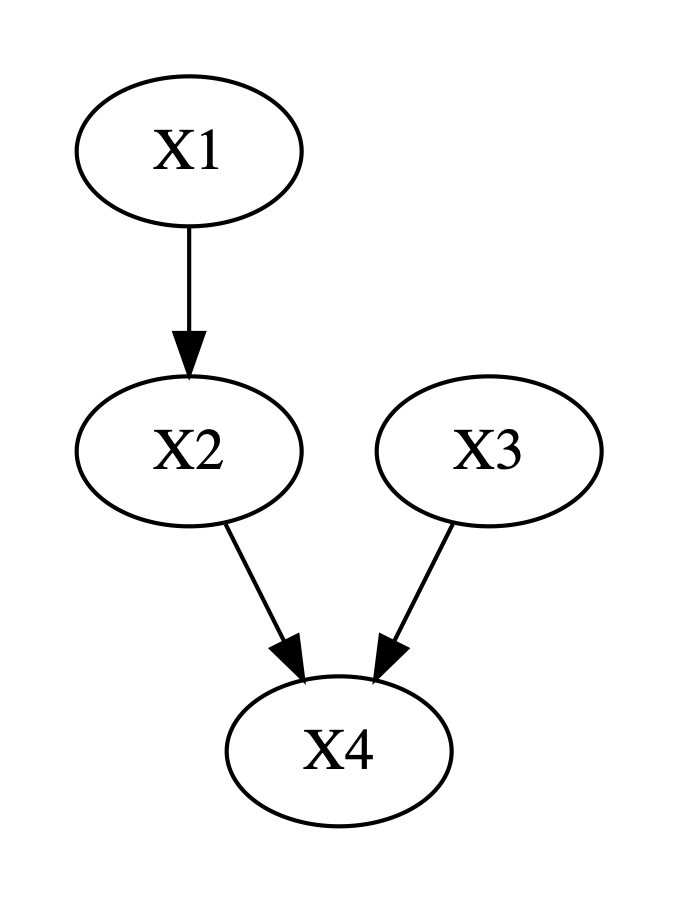

In [29]:
from pgmpy.models import BayesianModel
from IPython.core.display import Image
from networkx.drawing.nx_pydot import to_pydot

model = BayesianModel([('X1', 'X2'), ('X2', 'X4'), ('X3', 'X4')])
model.add_cpds(cpd_X1, cpd_X2, cpd_X3, cpd_X4)

d = to_pydot(model)
d.set_dpi(300)
d.set_margin(0.2)
Image(d.create_png(), width=400)

In [30]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)

$$
1. P(X4 = 1) \\
2. P(X4 = 1 \mid X3 = 1)\\
3. P(X4 = 1 \mid X1 = 1)
$$

In [31]:
posterior_1 = infer.query(['X4'])
print(posterior_1['X4'])

╒══════╤═══════════╕
│ X4   │   phi(X4) │
╞══════╪═══════════╡
│ X4_0 │    0.6152 │
├──────┼───────────┤
│ X4_1 │    0.3848 │
╘══════╧═══════════╛


In [32]:
posterior_2 = infer.query(['X4'], evidence={'X3': 1})
print(posterior_2['X4'])

╒══════╤═══════════╕
│ X4   │   phi(X4) │
╞══════╪═══════════╡
│ X4_0 │    0.4040 │
├──────┼───────────┤
│ X4_1 │    0.5960 │
╘══════╧═══════════╛


In [33]:
posterior_3 = infer.query(['X4'], evidence={'X1': 1})
print(posterior_3['X4'])

╒══════╤═══════════╕
│ X4   │   phi(X4) │
╞══════╪═══════════╡
│ X4_0 │    0.3240 │
├──────┼───────────┤
│ X4_1 │    0.6760 │
╘══════╧═══════════╛
